### Stochastic Volatility Models

Financial Time Series의 변동성을 설명하기 위한 대안적 접근법은 conditional variance equation인 $a_t$에 다른 접근법을 도입하는 것이다. 그 결과로 확률적 변동성 모델(stochastic volatility model)이 제작되었다. $\mathrm{EGARCH}$ 모형과 마찬가지로 조건부 분산이 양수라는 것을 보장하기 위해 SV 모형 또한 $\sigma_t^2$ 대신 $\ln \sigma_t^2$를 사용한다

#### 1 Stochastic volatility model

1987년 Hull과 White는 Black과 Scholes가 제안한 모형을 일반화하여 옵션 가격 분석에 이용하였는데, 이 모형이 Stchastic volatility 모형의 표준적인 형태로 사용되고 있다. stochastic volatility model은 다음과 같이 정의된다
$$a_t = \sigma_t \epsilon_t, ~~~~~ (1 - \alpha_1B - \cdots - \alpha_m B^m) \ln(\sigma_t^2) = \alpha_0 + v_t$$

여기서 $\epsilon_t$는 iid이고 평균이 0, 분산이 1인 정규분포를 따르며, $v_t$는 iid이고 평균이 0, 분산이 $\sigma_v^2$인 정규분포를 따른다. $\{\epsilon_t\}, \{v_t\}$는 모두 독립이고, $\alpha_0$은 상수이다. SV 모델을 추정하려면 Kalman Filtering 또는 Monte Carlo Method를 통한 quasi-likelihood methods가 필요하다

Jacquier, Polson, Rossi는 $m=1$일때 SV model의 특성을 정리하였다

$$\ln (\sigma_t^2) \sim N(\frac{\alpha_0}{1-\alpha_1}, \frac{\sigma_v^2}{1 - \alpha_1^2}) \equiv N(\mu_h, \sigma_h^2)$$

여기서
$$E(a_t^2) = \exp (\mu_h + \sigma_h^2/2)$$
$$E(a_t^4) = 3 \exp (2 \mu_h^2 + 2 \sigma_h^2)$$
$$\mathrm{corr} = \frac{\exp(\sigma_h^2\alpha_1^i) - 1}{3 \exp(\sigma_h^2 - 1)}$$

제한적인 경험에 따르면 SV 모형은 종종 모형 적합성 개선에는 기여했으나, 표본 외 변동성 예측에 대한 성능은 상반된 평가를 받았다. 예측 편향이 증가하고 분산이 줄어든 결과로 보인다

#### 2. Long memory Stochastic volatility model

최근에는 Fractional difference의 아이디어를 이용하여 장기 기억의 변동성을 포함할 수 있도록 SV model을 일반화하는 모형이 있다. 시장의 장기 기억을 가지고 있는 단순한 Long Memory Stochastic Volatility (LMSV) model은 다음과 같이 쓸 수 있다

$$a_t = \sigma_t \epsilon_t, ~~~~~ \sigma_t = \sigma \exp(u_t/2), ~~~~~ (1-B)^d u_t = \eta_t$$

여기서 $\sigma > 0 ,\epsilon_t$는 iid이고 $N(0,1)$이다. $\eta_t$는 iid이며 $N(0,\sigma_\eta^2)$이고 $\epsilon_t$에 대해 독립적이다. 적분차수 d는 0와 0.5사이에 있다고 가정한다. 적분차수가 1보다 작으므로 ACF는 1차 적분계열에 비해 좀 더 느리게 낮아지고, time lag는 늘어날 것이다

$$\begin{matrix}
\ln(a_t^2) &=& \ln(\sigma^2) + u_t + \ln(\epsilon_t^2) \\
       &=& [\ln(\sigma^2) + E(\ln \epsilon_t^2)] + u_t + [\ln(\epsilon_t^2) - E(\ln \epsilon_t^2)] \\
       &\equiv& \mu+u_t + e_t
\end{matrix}$$

따라서, $\ln(a_t^2)$는 Gaussian long-memory signal에 non gaussian white noise이다. Long memory Stochastic volatility model의 추정은 매우 복잡하다. 여기서 fractional difference parameter $d$는 quasi maximum likelihood method이나 regression method를 사용해서 추정한다

#### example 1
아래의 함수를 사용하여 KOSDAQ 주가지수의 2020년 1월 1일부터 2022년 12월 31일까지의 일별 데이터를 가지고 확률적 변동성 모형을 추정해 보라. 그리고 example 2에서 추정한 $\mathrm{GARCH}$모형의 변동성과 비교하라. 어떤 차이가 있는가?

In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

kosdaq = pdr.DataReader("KOSDAQ", "naver", start_date, end_date).astype(float)
kosdaq

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,672.53,674.30,666.62,674.02,783730.0
2020-01-03,677.57,679.37,668.10,669.93,903858.0
2020-01-06,660.08,663.10,653.61,655.31,884278.0
2020-01-07,660.87,664.21,659.18,663.44,970306.0
2020-01-08,657.24,658.14,637.43,640.94,1379708.0
...,...,...,...,...,...
2022-12-23,704.93,704.93,691.25,691.25,1107302.0
2022-12-26,691.94,696.96,686.80,694.68,797707.0
2022-12-27,697.25,704.21,697.25,704.19,901437.0


In [3]:
import numpy as np
ret = np.log(kosdaq.Close / kosdaq.Close.shift(1)).dropna()
ret

Date
2020-01-03   -0.006087
2020-01-06   -0.022065
2020-01-07    0.012330
2020-01-08   -0.034503
2020-01-09    0.038489
                ...   
2022-12-23   -0.033809
2022-12-26    0.004950
2022-12-27    0.013597
2022-12-28   -0.016928
2022-12-29   -0.019072
Name: Close, Length: 741, dtype: float64

SV model 추정을 위해 데이터를 import한다

In [4]:
import os
import arviz as az
import pymc as pm

rng = np.random.default_rng(42)

def StochasticVolatilityModel(data, stepsize : int , nu : float):
    with pm.Model(coords = {"time": data.index.values}) as model:
        step_size = pm.Exponential("step_size", stepsize)
        volatility = pm.GaussianRandomWalk("volatility", sigma = step_size, dims = "time")
        nu = pm.Exponential("nu", nu)
        returns = pm.StudentT("returns", nu = nu, lam = np.exp(-2 * volatility), observed = data, dims = "time")
    return model

arviz와 pymc package는 Bayesian method를 제공한다

In [5]:
svmodel = StochasticVolatilityModel(ret, stepsize = 10, nu = 0.1)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/pymc/distributions/timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(


In [7]:
with svmodel:
    idata = pm.sample_prior_predictive(500, random_seed = rng)

prior_predictive = az.extract(idata, group = "prior_predictive")

Sampling: [nu, returns, step_size, volatility]


pymc library의 `sample_prior_predictive` 함수를 사용하여 prior distribution을 추정한다

In [8]:
prior_predictive

<xarray.Dataset>
Dimensions:  (time: 741, sample: 500)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 2020-01-06 ... 2022-12-29
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
Data variables:
    returns  (time, sample) float64 3.843e+06 1.279e-62 ... -0.008383 -1.906e+25
Attributes:
    created_at:                 2023-09-21T01:31:26.371948
    arviz_version:              0.16.0
    inference_library:          pymc
    inference_library_version:  5.6.1

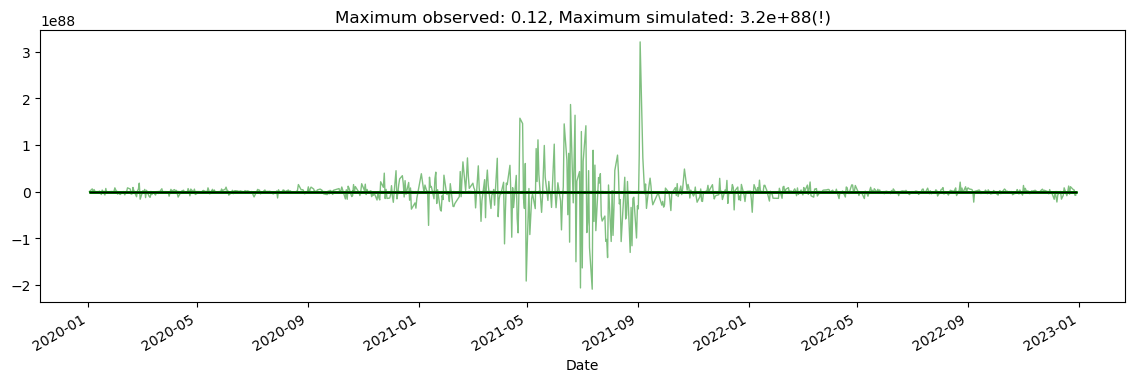

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (14, 4))
ret.plot(ax = ax, lw = 1, color = "black")
res = pd.DataFrame(prior_predictive["returns"][:, 0::10].values)
res.index = ret.index
ax.plot(res, "g", alpha = 0.5, lw = 1, zorder = -10)

max_observed, max_simulated = np.max(np.abs(ret)), np.max(np.abs(res))
ax.set_title(f"Maximum observed: {max_observed:.2g}, Maximum simulated: {max_simulated:.2g}(!)");

경험적 시계열 이외에 montecarlo simulation을 통한 prior의 return을 얻어낼 수 있다

In [10]:
with svmodel :
    idata.extend(pm.sample(random_seed = rng))

posterior = az.extract(idata)
posterior["exp_volatility"] = np.exp(posterior["volatility"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [step_size, volatility, nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [11]:
with svmodel:
    idata.extend(pm.sample_posterior_predictive(idata, random_seed = rng))

posterior_predictive = az.extract(idata, group = "posterior_predictive")

Sampling: [returns]


위와 같이 베이즈 정리를 이용해 posterior 사건으로 prior 사건을 구한다

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'step_size'}>,
        <Axes: title={'center': 'step_size'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

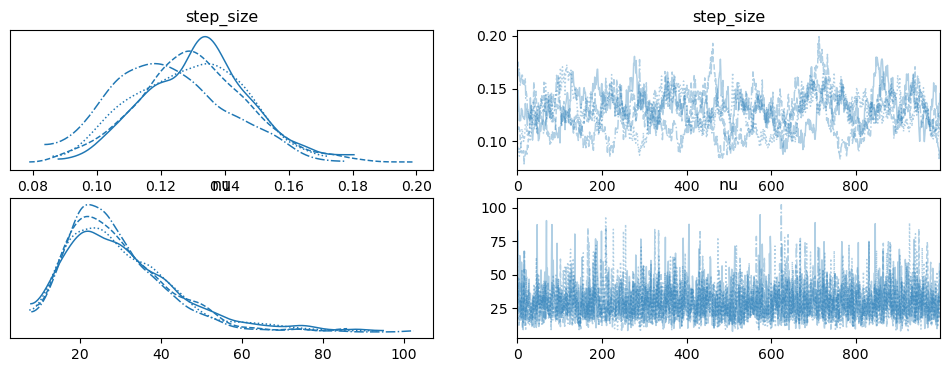

In [12]:
az.plot_trace(idata, var_names = ["step_size", "nu"])

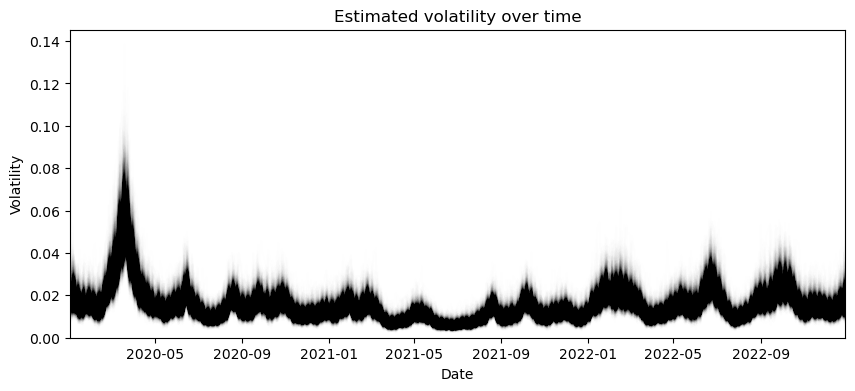

In [13]:
fig, ax = plt.subplots(figsize = (10, 4))

y_vals = posterior["exp_volatility"]
x_vals = y_vals.time.astype(np.datetime64)

plt.plot(x_vals, y_vals, "k", alpha = 0.002)
ax.set_xlim(x_vals.min(), x_vals.max())
ax.set_ylim(bottom = 0)
ax.set(title = "Estimated volatility over time", xlabel = "Date", ylabel = "Volatility");

Montecarlo simulation을 통해 posterior 사건들의 변동성을 구할 수 있다

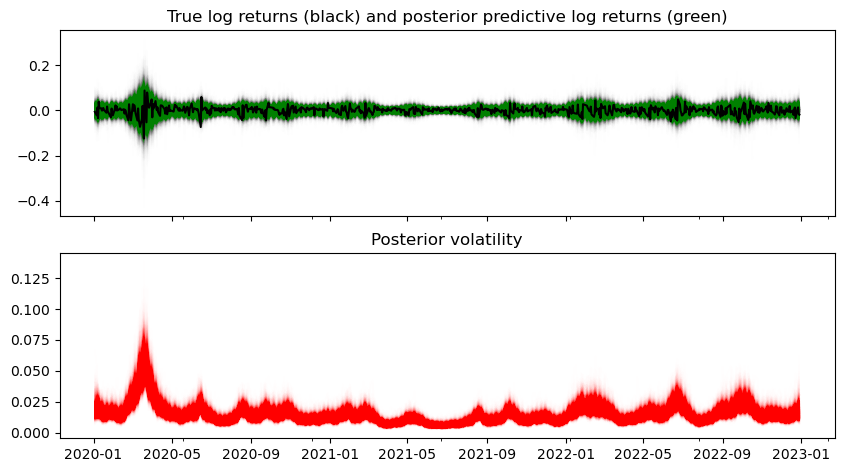

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex = True)
ret.plot(ax=axes[0], color="black")

axes[1].plot(pd.DataFrame(posterior["exp_volatility"], index = ret.index), "r", alpha = 0.005)
axes[0].plot(pd.DataFrame(posterior_predictive["returns"], index = ret.index), "g", alpha = 0.005, zorder = -10)
axes[0].set_title("True log returns (black) and posterior predictive log returns (green)")
axes[1].set_title("Posterior volatility");

추정된 montecarlo simulation의 변동성은 위와 같다

SV model로 추정한 결과에 비해 $\mathrm{GARCH}(1,2)$로 추정한 결과가 편향이 있는 결과를 보인다. 반면에 SV model은 경험적 $\mathrm{GARCH}(1,2)$ 모형에 비해서 변동성이 낮은 구간에서는 과소 추정을, 높은 구간에서는 과대 추정을 하는 것으로 보인다. 이는 monte carlo simulation에서 상승과 하강 확률을 동일하게 정규분포로 추정하였기 때문에 생긴 차이인 것으로 보인다

#### Exercise 1

KOSPI에 상장된 회사 중 하나를 선정하여 2020년 1월 1일부터 2022년 12월 31일까지의 $\mathrm{GARCH}$모형과 $\mathrm{SV~model}$을 추정하라. 그리고 그 둘의 결과를 비교해 보라. 최적의 $\mathrm{GARCH}$모형의 order는 무엇인가? $\mathrm{SV~model}$과 어떤 차이를 보이는가?

#### 2. Aiternative Approaches

**2.1 Corwin and Schultz**

Corwin, Schultz는 매매 호가 스프레드를 가격의 퍼센티지로 다음과 같이 계산할 수 있다는 것을 보였다. 매매 호가 스프레드는 장중 High, Low 가격에 대한 series로 대체될 수 있다

$$S_t = \frac{2(e^{\alpha_t}-1)}{1+e^{\alpha_t}}$$

여기서

$$\alpha_t = \frac{\sqrt{2\beta_t} - \sqrt{\beta_t}}{3 - 2\sqrt{2}} - \sqrt{\frac{\gamma_t}{3-2\sqrt{2}}}$$
$$\beta_t = E \Big[\sum_{j=0}^1 \Big[\log \Big(\frac{H_{t-j}}{L_{t-j}} \Big) \Big]^2\Big]$$
$$\gamma_t = \Big[\log \Big(\frac{H_{t-1, t}}{L_{t-1, t}}\Big) \Big]^2$$

$H_{t-1,t}$는 두 기간에 걸친 고가이고, $L_{t-1,t}$는 두 기간에 걸친 저가이다. Corwin-Schultz의 식에서는 변동성이 보이지 않는데, 이는 고가/저가 추정량으로 대체되었기 때문이다. 이 모델로써 벡커-파킨슨 변동성을 유도할 수 있다

**2.2 High-Low Volatility Estimator**

Parkinson(1980)은 기하 브라운 운동을 따르는 연속적으로 관측되는 가격에 대해 다음을 유도했다

$$E\Big[ \frac{1}{T} \sum_{t=1}^T \Big( \log\Big[\frac{H_t}{L_t}\Big]\Big)\Big] = k_1\sigma_{HL}^2$$
$$E\Big[ \frac{1}{T} \sum_{t=1}^T \Big( \log\Big[\frac{H_t}{L_t}\Big]\Big)\Big] = k_2\sigma_{HL}$$

여기서 $k_1 = 4\log(2), k_1 = \sqrt{\frac{8}{\pi}}$, $H_t$는 바 t에 대한 고가이고, $L_t$는 바 t에 대한 저가이다. 그러면 변동성 특성 $\sigma_{HL}$은 관측된 고가-저가에 기초해 안정적으로 계산 가능하다

#### example 2

다음의 함수들을 이용하여 Becker Parkinson range volatility를 추정하라. range volatility 추정을 위해 Corwin & Schultz의 스프레드를 사용할 수 있다. 데이터는 2020년 1월 1일부터 2022년 12월 31일까지의 Apple 가격 데이터를 이용하라. Becker Parkinson volatility는 $\mathrm{GARCH}$모형과 비교하였을때 어떠한 특징을 보이는가?

In [17]:
def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

yfinance를 이용해 Apple의 일별 주가 데이터를 가져오도록 한다

In [18]:
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-01-01'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249046,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536873,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114891,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941650,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


$\beta$는 주식 가격 변동성과 거래량 사이의 관계를 나타내는 지표이다. 거래량과 가격 변동성의 상관관계를 나타내므로, 상대 강도를 결정하는 데에 영향을 미치게 된다

In [19]:
getBeta(apple, 1)

Date
2020-01-03    0.000517
2020-01-06    0.000779
2020-01-07    0.000723
2020-01-08    0.000716
2020-01-09    0.000774
                ...   
2022-12-23    0.001485
2022-12-27    0.000878
2022-12-28    0.002042
2022-12-29    0.002068
2022-12-30    0.000837
Length: 755, dtype: float64

$\gamma$는 주식의 상대 강도(Spread)를 계산하는 데에 사용되는 또 다른 지표이다. 특정 윈도우 간의 고가와 저가 의 로그 차분값의 제곱으로 계산된다

In [20]:
getGamma(apple)

Date
2020-01-03    0.000330
2020-01-06    0.000697
2020-01-07    0.000754
2020-01-08    0.000586
2020-01-09    0.001909
                ...   
2022-12-23    0.001387
2022-12-27    0.000803
2022-12-28    0.001855
2022-12-29    0.001614
2022-12-30    0.000559
Length: 755, dtype: float64

$\alpha$는 주식의 가격 변동성과 거래량 사이의 관계를 조합하여 주식의 상대적인 강도를 나타내는 지표이다. $\alpha$가 음수인 경우, 주식의 가격 변동과 거래량 사이의 관계에서 상대적으로 약한 상태를 나타낸다

<Axes: title={'center': 'Corwin-Schultz bid-ask spread'}, xlabel='Date'>

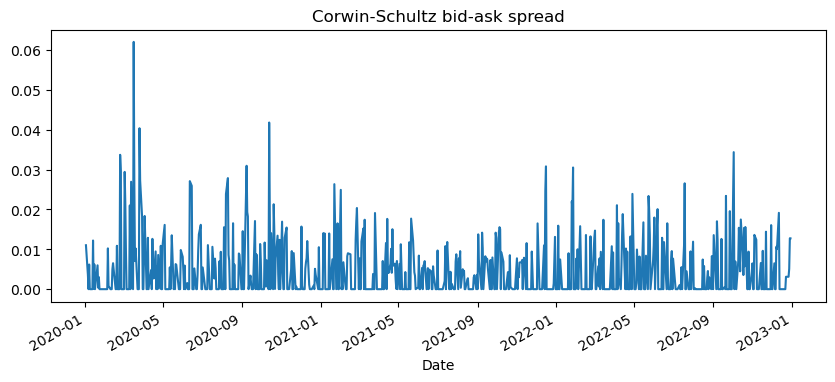

In [21]:
getAlpha(getBeta(apple, 1), getGamma(apple)).plot(figsize = (10,4), title = 'Corwin-Schultz bid-ask spread')

`corwinSchultz()` 함수는 spread의 상대 강도와 start time의 정보를 담는 pandas DataFrame 형태의 데이터를 출력한다

In [22]:
corwinSchultz(apple, sl = 1)

,Spread,Start_time
Date,,
2020-01-03,0.369908,2020-01-02
2020-01-06,0.368550,2020-01-03
2020-01-07,0.367879,2020-01-06
2020-01-08,0.369018,2020-01-07
2020-01-09,0.367879,2020-01-08
...,...,...
2022-12-23,0.368452,2022-12-22
2022-12-27,0.368453,2022-12-23
2022-12-28,0.368819,2022-12-27


`getSigma`함수를 사용하여 고가/저가 추정량으로 대체된 Becker Parkinson 변동성을 구할 수 있다

<Axes: title={'center': 'Becker Parkinson Volatility Estimator'}, xlabel='Date'>

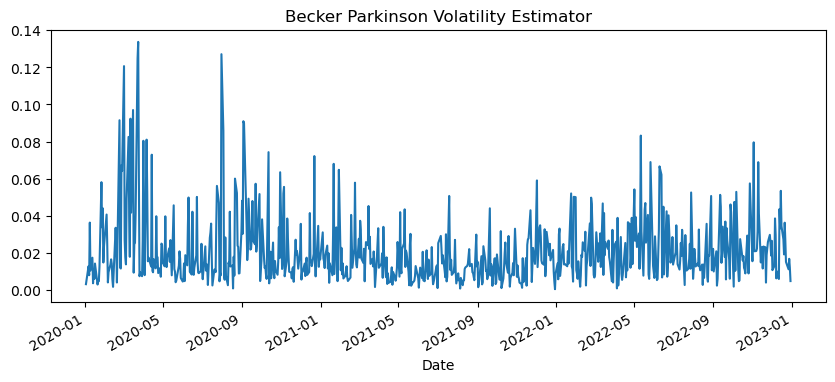

In [23]:
getSigma(getBeta(apple, 1), getGamma(apple)).plot(figsize = (10,4), title = 'Becker Parkinson Volatility Estimator')

$\mathrm{GARCH}$모형에서 추정된 변동성과 비교를 위해 $\mathrm{GARCH}$모형을 추정한다

In [24]:
ret_apple = np.log(apple.Close / apple.Close.shift(1)).dropna()
ret_apple

Date
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2022-12-23   -0.002802
2022-12-27   -0.013976
2022-12-28   -0.031166
2022-12-29    0.027931
2022-12-30    0.002466
Name: Close, Length: 755, dtype: float64

In [25]:
import arch
garch = arch.arch_model(ret_apple, vol = 'GARCH', p = 1, q = 1)
res_apple = garch.fit()
print(res_apple.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225695379.89944774
Iteration:      2,   Func. Count:     18,   Neg. LLF: 302.9834136433072
Iteration:      3,   Func. Count:     28,   Neg. LLF: 12912.25427675508
Iteration:      4,   Func. Count:     38,   Neg. LLF: -1707.0711600948507
Iteration:      5,   Func. Count:     46,   Neg. LLF: -1644.0433437681966
Iteration:      6,   Func. Count:     53,   Neg. LLF: -1811.5802664212047
Iteration:      7,   Func. Count:     61,   Neg. LLF: -1845.452246469206
Iteration:      8,   Func. Count:     67,   Neg. LLF: -1847.6232782626375
Iteration:      9,   Func. Count:     72,   Neg. LLF: -1847.6232683707692
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1847.6232782626287
            Iterations: 10
            Function evaluations: 82
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared: 

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005402. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [26]:
garch1 = arch.arch_model(ret_apple, vol = 'GARCH', p = 1, q = 2)
res_apple1 = garch1.fit()
print(res_apple1.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 230508830.41650394
Iteration:      2,   Func. Count:     19,   Neg. LLF: -1844.1001442286884
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1844.1001441211997
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1844.10
Distribution:                  Normal   AIC:                          -3678.20
Method:            Maximum Likelihood   BIC:                          -3655.07
                                        No. Observations:                  755
Date:                Thu, Sep 21 2023   Df Residuals:                      754
Time:       

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005402. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [27]:
garch2 = arch.arch_model(ret_apple, vol = 'GARCH', p = 2, q = 1)
res_apple2 = garch2.fit()
print(res_apple2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2263794338.6448774
Iteration:      2,   Func. Count:     20,   Neg. LLF: 5063653.701232329
Iteration:      3,   Func. Count:     34,   Neg. LLF: 19929.31803792869
Iteration:      4,   Func. Count:     46,   Neg. LLF: 44307635.11934748
Iteration:      5,   Func. Count:     59,   Neg. LLF: 13438.839355009966
Iteration:      6,   Func. Count:     71,   Neg. LLF: 5833348.680738928
Iteration:      7,   Func. Count:     85,   Neg. LLF: 1238212.747452645
Iteration:      8,   Func. Count:     98,   Neg. LLF: 98935.08565513752
Iteration:      9,   Func. Count:    110,   Neg. LLF: 3692.350923839985
Iteration:     10,   Func. Count:    122,   Neg. LLF: 59041.07372582774
Iteration:     11,   Func. Count:    134,   Neg. LLF: 2167935.6409779843
Iteration:     12,   Func. Count:    148,   Neg. LLF: 1525186.5274084755
Iteration:     13,   Func. Count:    161,   Neg. LLF: 458163.21924747364
Iteration:     14,   Func. Count:    174,   Neg. LLF: 22545

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005402. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


$\mathrm{GARCH}(1,2)$모형이 가장 적합하다고 판단하여 이 모형의 추정량을 사용한다

Text(0.5, 1.0, 'GARCH vs Becker Parkinson Range Volatility')

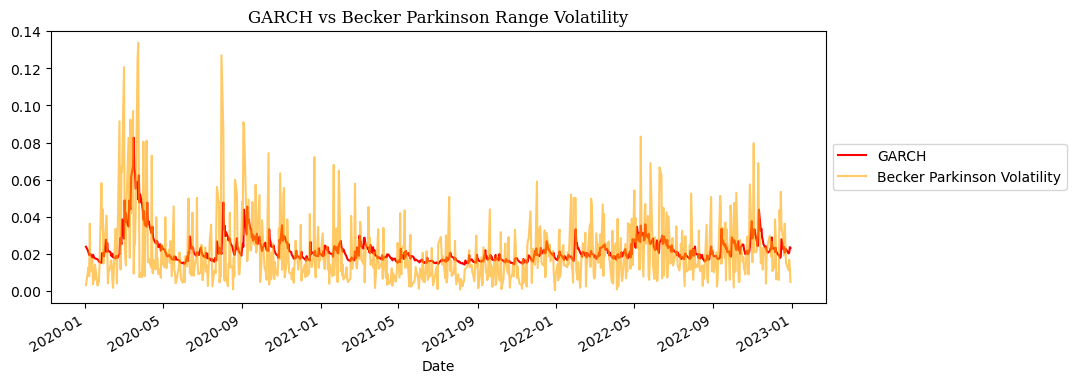

In [28]:
res_apple1.conditional_volatility.plot(figsize = (10, 4), label = 'GARCH', color = 'r')
getSigma(getBeta(apple, 1), getGamma(apple)).plot(figsize = (10,4), label = 'Becker Parkinson Volatility', alpha = 0.6, color = 'orange')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GARCH vs Becker Parkinson Range Volatility', fontfamily = 'Serif', fontsize = 12)

$\mathrm{GARCH}$모형을 이용해 추정한 변동성이 Becker Parkinson 변동성 추정량의 하나의 상태 공간(State Space)처럼 작용한다

#### Exercise 2

Exercise 1에서 사용한 가격 Series를 사용하여 다음 물음에 답하라
1. Corwin-Schultz spread를 추정하라

2. 추정된 spread를 활용하여 Becker Parkinson Range Volatility를 추정하라

3. SV model로 추정한 변동성과 어떤 차이를 보이는가?

4. $\mathrm{GARCH}$모형으로 추정한 변동성과는 어떤 차이를 보이는가?

5. 위험 회피 거래가 목적이라면 세 개의 변동성 추정량 중 어떤 추정량을 사용해야 하는가?